### Binary Classification - SVMs

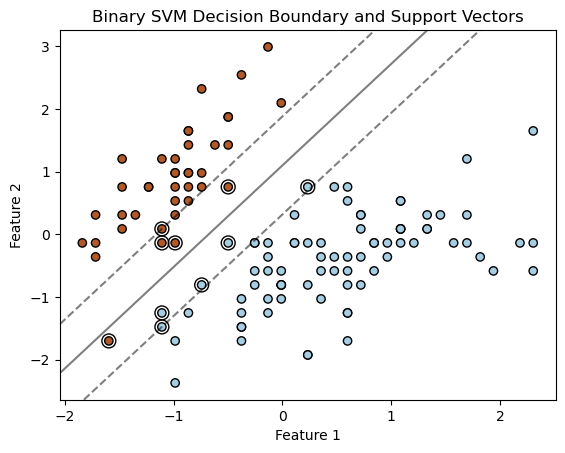

Binary Classification:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [1]:
#TASK 1 : Train SVM for Binary Classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Binary Classification (class 0 vs. rest)
binary_y_train = (y_train == 0).astype(int)
binary_y_test = (y_test == 0).astype(int)

# Train SVM for binary classification
binary_svm = SVC(kernel='linear', C=1)
binary_svm.fit(X_train_scaled, binary_y_train)

# Plot decision boundary and support vectors for binary classification
def plot_svm_binary(X, y, model, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

    # Plot the decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary and margins
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Plot support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_svm_binary(X_train_scaled, binary_y_train, binary_svm, 'Binary SVM Decision Boundary and Support Vectors')

# Make predictions for binary classification
binary_predictions = binary_svm.predict(X_test_scaled)

# Evaluate binary classification
binary_accuracy = accuracy_score(binary_y_test, binary_predictions)
binary_classification_report = classification_report(binary_y_test, binary_predictions)

print("Binary Classification:")
print("Accuracy:", binary_accuracy)
print("Classification Report:")
print(binary_classification_report)



### Multiclass Classification - SVMs

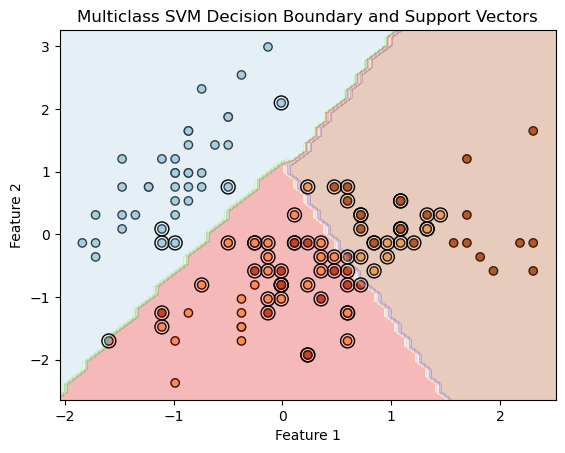


Multiclass Classification:
Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [2]:
#TASK 1 : Train SVM for Multiclass Classification


# Train SVM for multiclass classification
multiclass_svm = SVC(kernel='linear', C=1)
multiclass_svm.fit(X_train_scaled, y_train)

# Plot decision boundary and support vectors for multiclass classification
def plot_svm_multiclass(X, y, model, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

    # Plot the decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)

    # Plot support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_svm_multiclass(X_train_scaled, y_train, multiclass_svm, 'Multiclass SVM Decision Boundary and Support Vectors')

# Make predictions for multiclass classification
multiclass_predictions = multiclass_svm.predict(X_test_scaled)

# Evaluate multiclass classification
multiclass_accuracy = accuracy_score(y_test, multiclass_predictions)
multiclass_classification_report = classification_report(y_test, multiclass_predictions)

print("\nMulticlass Classification:")
print("Accuracy:", multiclass_accuracy)
print("Classification Report:")
print(multiclass_classification_report)


### K-means algorithm

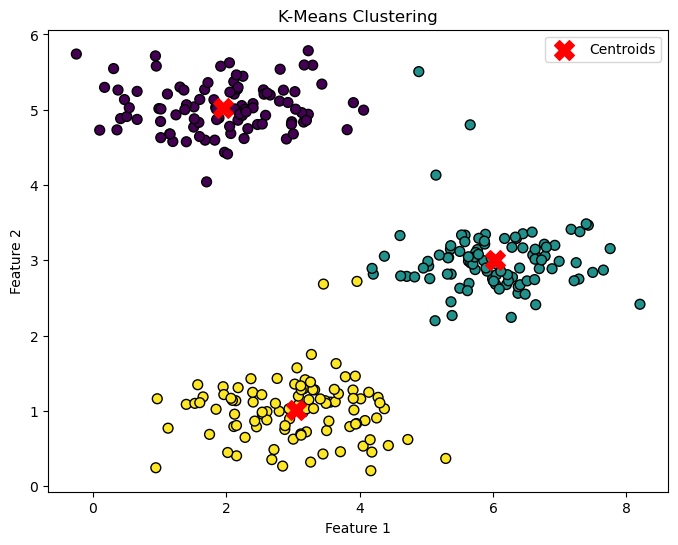

In [2]:
#TASK 2 : K-means Algorithm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def k_means(X, k=3, max_iters=10):
    min_dispersion_cost = np.inf
    final_labels = None
    final_centroids = None

    for _ in range(max_iters):
        # Randomly initialize centroids
        centroids = X[np.random.choice(range(len(X)), k, replace=False)]

        for _ in range(max_iters):
            # Assign each point to the closest centroid
            labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

            # Update centroids
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

            # Check for convergence
            if np.all(centroids == new_centroids):
                break

            centroids = new_centroids

        # Calculate dispersion cost
        dispersion_cost = np.sum([np.sum(np.linalg.norm(X[labels == i] - centroids[i], axis=1)) for i in range(k)])

        # Update if the current dispersion cost is lower
        if dispersion_cost < min_dispersion_cost:
            min_dispersion_cost = dispersion_cost
            final_labels = labels
            final_centroids = centroids

    return final_labels, final_centroids

csv_file_path = "C:/Users/Admin/Downloads/k-means data.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
X = df.values

# Perform k-means clustering with 3 clusters and 10 iterations
labels, centroids = k_means(X, k=3, max_iters=10)

# Plot the original data with colors representing the cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
